In [1]:
cd D:\Downloads

D:\Downloads


In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv('train_house_price_prediction.csv')
test=pd.read_csv('test_house_price_prediction.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
print(train.columns)
print(f'length of dataset:{len(train)}')
print(f'columns:{train.shape[1]}')

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
type(train.iloc[1,32])


str

In [7]:
from sklearn.impute import SimpleImputer
for i in range(train.shape[1]):
    print(f'{i}-{train.columns[i]}:{train.iloc[:,i].isnull().sum()}')
    if (train.iloc[:,i].isnull().sum()!=0):
        try:
            if(train.iloc[0,i].dtype=='int64' or train.iloc[0,i].dtype=='float64'):
                imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
                imputer.fit(train.iloc[:,i].values.reshape(-1,1))
                train.iloc[:,i]=imputer.transform(train.iloc[:,i].values.reshape(-1,1))
        except:
                imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
                imputer.fit(train.iloc[:,i].values.reshape(-1,1))
                train.iloc[:,i]=imputer.transform(train.iloc[:,i].values.reshape(-1,1))

0-Id:0
1-MSSubClass:0
2-MSZoning:0
3-LotFrontage:259
4-LotArea:0
5-Street:0
6-Alley:1369
7-LotShape:0
8-LandContour:0
9-Utilities:0
10-LotConfig:0
11-LandSlope:0
12-Neighborhood:0
13-Condition1:0
14-Condition2:0
15-BldgType:0
16-HouseStyle:0
17-OverallQual:0
18-OverallCond:0
19-YearBuilt:0
20-YearRemodAdd:0
21-RoofStyle:0
22-RoofMatl:0
23-Exterior1st:0
24-Exterior2nd:0
25-MasVnrType:8
26-MasVnrArea:8
27-ExterQual:0
28-ExterCond:0
29-Foundation:0
30-BsmtQual:37
31-BsmtCond:37
32-BsmtExposure:38
33-BsmtFinType1:37
34-BsmtFinSF1:0
35-BsmtFinType2:38
36-BsmtFinSF2:0
37-BsmtUnfSF:0
38-TotalBsmtSF:0
39-Heating:0
40-HeatingQC:0
41-CentralAir:0
42-Electrical:1
43-1stFlrSF:0
44-2ndFlrSF:0
45-LowQualFinSF:0
46-GrLivArea:0
47-BsmtFullBath:0
48-BsmtHalfBath:0
49-FullBath:0
50-HalfBath:0
51-BedroomAbvGr:0
52-KitchenAbvGr:0
53-KitchenQual:0
54-TotRmsAbvGrd:0
55-Functional:0
56-Fireplaces:0
57-FireplaceQu:690
58-GarageType:81
59-GarageYrBlt:81
60-GarageFinish:81
61-GarageCars:0
62-GarageArea:0
63-Gar

In [8]:
from sklearn.preprocessing import LabelEncoder
for i in range(train.shape[1]):
    if(type(train.iloc[0,i])==str):
        le=LabelEncoder()
        train.iloc[:,i]=le.fit_transform(train.iloc[:,i])
        train.iloc[:,i]


In [9]:
train.drop(columns=['Alley','PoolQC','MiscFeature'],inplace=True)

In [10]:
for i in range(train.shape[1]):
    print(f'{train.columns[i]}:{train.iloc[:,i].isnull().sum()}')

Id:0
MSSubClass:0
MSZoning:0
LotFrontage:0
LotArea:0
Street:0
LotShape:0
LandContour:0
Utilities:0
LotConfig:0
LandSlope:0
Neighborhood:0
Condition1:0
Condition2:0
BldgType:0
HouseStyle:0
OverallQual:0
OverallCond:0
YearBuilt:0
YearRemodAdd:0
RoofStyle:0
RoofMatl:0
Exterior1st:0
Exterior2nd:0
MasVnrType:0
MasVnrArea:0
ExterQual:0
ExterCond:0
Foundation:0
BsmtQual:0
BsmtCond:0
BsmtExposure:0
BsmtFinType1:0
BsmtFinSF1:0
BsmtFinType2:0
BsmtFinSF2:0
BsmtUnfSF:0
TotalBsmtSF:0
Heating:0
HeatingQC:0
CentralAir:0
Electrical:0
1stFlrSF:0
2ndFlrSF:0
LowQualFinSF:0
GrLivArea:0
BsmtFullBath:0
BsmtHalfBath:0
FullBath:0
HalfBath:0
BedroomAbvGr:0
KitchenAbvGr:0
KitchenQual:0
TotRmsAbvGrd:0
Functional:0
Fireplaces:0
FireplaceQu:0
GarageType:0
GarageYrBlt:0
GarageFinish:0
GarageCars:0
GarageArea:0
GarageQual:0
GarageCond:0
PavedDrive:0
WoodDeckSF:0
OpenPorchSF:0
EnclosedPorch:0
3SsnPorch:0
ScreenPorch:0
PoolArea:0
Fence:0
MiscVal:0
MoSold:0
YrSold:0
SaleType:0
SaleCondition:0
SalePrice:0


<AxesSubplot:>

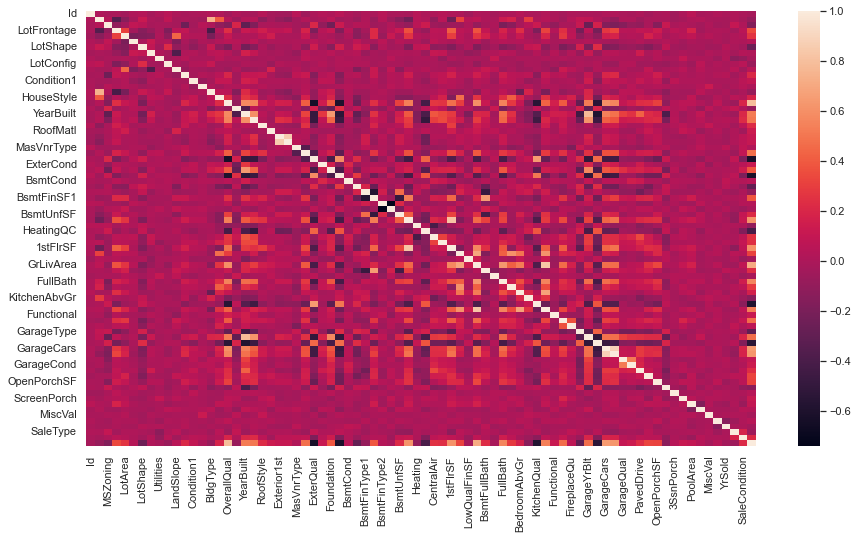

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(train.corr())


In [12]:
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,0,0,0,2,0,4,2010,8,4,142125


In [13]:
X=train.iloc[:,1:-1].values
Y=train.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,shuffle=False)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test) 
Y_train=sc_y.fit_transform(Y_train.reshape(-1,1)).ravel()

In [16]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr=GBR()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [17]:
predict=gbr.predict(X_test)

In [18]:
predict=sc_y.inverse_transform(predict.reshape(-1,1)).ravel()

In [19]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,predict)
score

0.8974938895941202

In [20]:
predict

array([192663.60848882, 630525.52659696, 143200.67228987, 158702.44140983,
       159386.07465212, 216451.6492944 , 184540.07617673, 346196.74533409,
       125735.15202346, 116377.53654387, 117655.44951714,  94918.79538253,
       260782.03370549, 273086.98239244, 618504.90265981, 141148.0150384 ,
       195812.11170357, 130753.51730983, 129267.54997636, 289796.98590048,
       187722.68490349, 197675.72170745, 164889.16865905, 192424.23630462,
       129186.37923289, 166044.7414516 , 137870.61551951, 162983.45859629,
       232566.58148989, 160441.6438856 , 180254.57933095, 147774.48813012,
       102026.9527884 , 201083.04846331, 125460.90321704, 199817.67033869,
       146363.47156136, 264635.77912001, 117016.52288044, 202642.75627131,
       137419.88058154, 286431.79688684, 191334.81874487, 215340.4946867 ,
        95719.3604114 , 121567.56222995, 127961.37609793, 115896.53195811,
       147667.22934667, 265753.2087336 ,  73666.38188658,  90366.35049887,
       117476.27755052, 1